# Random Variables

🎯 The goal of this notebook is to build **intuitions about probability theory**.

In [1]:
# --- Math and Data Manipulation
import numpy as np
import math

# --- Data Visualisation
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

## 1. Bernoulli and Binomial distributions

### 1.1 Flipping a coin multiple times

💡 Quick reminder : 
* a probability equal to 0 (= 0%) means that an event will _never occur_
* a probability equal to 1 (= 100%)  means that an event will _happen for sure_.

👉 Suppose that we **`flip a coin 4 times`** 👈

❓ Can you answer the following ***questions*** ❓
1. How many possible outcomes do we have?
2. What is the probability of getting 4 heads?
3. What is the probability of getting exactly 2 heads and 2 tails?

✍️ Take your time to grab a pen and a piece of paper to answer these questions. You can draw a `tree` to help you answers these questions.


<details>
    <summary><i>Hint</i></summary>


<i>Think about the possible results of each flip: it is either a **head** (1) or a **tail** (0)</i>
</details>

💡 Untoggle the _answers_ and the _visual representation_ below only after searching for 10-15 minutes.

<details>
    <summary>Answers</summary>

> ***1.*** How many possible outcomes do we have when flipping a coin 4 times ? 

There are $16 = 2 \times 2 \times 2 \times 2 = 2^4$ possible outcomes.

| Flip 1 | Flip 2 | Flip 3 | Flip 4 |
|:--------:|:--------:|:--------:|:------:|
| 1      | 1      | 1      | 1      |
| 1      | 1      | 1      | 0      |
| 1      | 1      | 0      | 1      |
| 1      | 1      | 0      | 0      |
| 1      | 0      | 1      | 1      |
| 1      | 0      | 1      | 0      |
| 1      | 0      | 0      | 1      |
| 1      | 0      | 0      | 0      |
| 0      | 1      | 1      | 1      |
| 0      | 1      | 1      | 0      |
| 0      | 1      | 0      | 1      |
| 0      | 1      | 0      | 0      |
| 0      | 0      | 1      | 1      |
| 0      | 0      | 1      | 0      |
| 0      | 0      | 0      | 1      |
| 0      | 0      | 0      | 0      |

    
> ***2.*** What is the probability of getting 4 heads?

There is only  1 way of getting 4 heads (and hence no tails).

| Flip 1 | Flip 2 | Flip 3 | Flip 4 |
|:--------:|:--------:|:--------:|:------:|
| 1      | 1      | 1      | 1      |

Let's call __A__ the event of getting exactly 4 heads.  The probability of A is:

$$ P(A) = \frac{1}{16} = 0.0625 = 6.25 \% $$


> ***3.*** What is the probability of getting exactly 2 heads and 2 tails?

There are 6 ways of getting 2 heads (and hence 2 tails).

| Flip 1 | Flip 2 | Flip 3 | Flip 4 |
|:--------:|:--------:|:--------:|:------:|
| 1      | 1      | 0      | 0      |
| 1      | 0      | 1      | 0      |
| 1      | 0      | 0      | 1      |
| 0      | 1      | 1      | 0      |
| 0      | 1      | 0      | 1      |
| 0      | 0      | 1      | 1      |


Let's call __B__ the event of getting exactly 2 heads and 2 tails. The probability of B is:

$$ P(B) = \frac{6}{16} = 0.375 = 37.5 \% $$

</details>

<details>
           <summary>Visual representation of this 4-coin experiment</summary>

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/toss_a_coin_four_times.jpeg">

</details>

### 1.2 A bit of theory about Binomial distributions (reading section)

---


❓❗️ With 4 flips, we can count the possibilities of the different scenarios "manually", but how would you do that with 200 flips ❓❗️

---

🧑‍🔬 **The context**:

- We are running an experiment $n$ times
- Each experiment has a probability $ p \in [0,1] $ of **success** ($ \Leftrightarrow $ a probability $ 1 - p $ of **failure**) 

😉 In the context of a **fair coin**, we obviously have $ p = 1 - p = 50 \% = 0.5 $

<u>Vocabulary:</u>
* An experiment with only two outcomes (success/failure) has a **Bernoulli (p) distribution**.
* When we repeat this Bernoulli process n times and count the numbers success $X$, we talk about a **Binomial (n,p) distribution**.



🧑🏻‍🏫 **Counting the number of "successes" among n repeated experiments**:

Counting the number of ways to get $k$ heads (the successes) among $n$ flips (the repeated experiment) ...

...is equivalent to counting the number of ways to select $k$ items from a set that has $n$ distinct elements, *such that the order of selection does not matter*

- If the order mattered, picking $k$ elements *one-by-one* among $n$ could be done in $n(n−1)...(n−k+1)$ ways ($n$ choice for the first element, $n-1$ for the second, ..., $n−k+1$ for the $k$-th )

- However, in this ordered count, any *unordered set* of $k$ elements have been counted $k(k-1)(k-2)...$ times ($k$ choice for the first, $k-1$ for the second, etc...)

- Therefore, if we want the *unordered* count, we have to compensate for (divide by) them. Hence, **the number of ways to get k successes out of n experiments** is given by:

$${\frac {n(n-1)\dotsb (n-k+1)}{k(k-1)\dotsb 1}}$$

This is mathematically equivalent to:

$$ \frac{n!}{k! (n - k)!} \text{ , where  } n! = 1\times 2 \times ... \times n $$

and is written

$$ \binom{n}{k} $$



* $ \binom{n}{k} $ reads as `"n choose k"`, or `"binomial coefficient for k among n"` 
* $ n!$ reads as `"n factorial"` 

📚 [Read This](https://www.mathsisfun.com/combinatorics/combinations-permutations.html)  and discuss about **permutations** and **combinations** with your buddy.

(_stop before the "Pascal triangle" section_)

---

😵‍ If you don't understand at first read, it's fine. The discipline of **combinatorics** is not easy. 

💪 But your buddy, the TAs and teachers are here to help !

---

### 1.3 Implementing the theory

👉 A general principle for "easy" situations like cards, coins, dice is to compute the probability of an event as follows: $$ probability = \frac{possibilities}{all.the.possibilities} $$

❓ Let's implement the functions `count_possibilities`, `count_total_possibilities` and  then`probability` down below ❓

* <i>Hint</i>: Use 📚 [`math.factorial()`](https://docs.python.org/3/library/math.html)

In [24]:
def count_possibilities(n_toss, n_heads):
    '''TO DO: return the number of possibilities to get n_heads when flipping the coin n_toss times
        Ex: count_possibilities(4, 4)  = 1'''
    return math.factorial(n_toss) / (math.factorial(n_heads) * math.factorial(n_toss - n_heads))

In [1]:
def count_total_possibilities(n_toss):
    # two outcomes, so n_toss to the power of 2
    '''TO DO: return the total amount of different combinations when flipping the coins n_toss times
        Ex: count_total_possibilities(3) = 8'''
    return 2 ** n_toss

In [31]:
def probability(n_toss):
    '''TO DO: return a dictionary. The keys will be the possible number of heads in each game,
            so they can't be over `n_toss` or under 0. The values for each of those keys will correspond
            to the probability of a game ending with that result.
      probability(5) = {0: ..., 1:..., 2:..., 3:..., 4:..., 5:...}'''
    count_heads_dict = {}
    for n_heads in range(n_toss+1):
        proba = count_possibilities(n_toss, n_heads)
        count_heads_dict[n_heads] = proba/count_total_possibilities(n_toss)
    return count_heads_dict
    

In [42]:
result = probability(50)
lst = []

for i in result.values():
    lst.append(i)

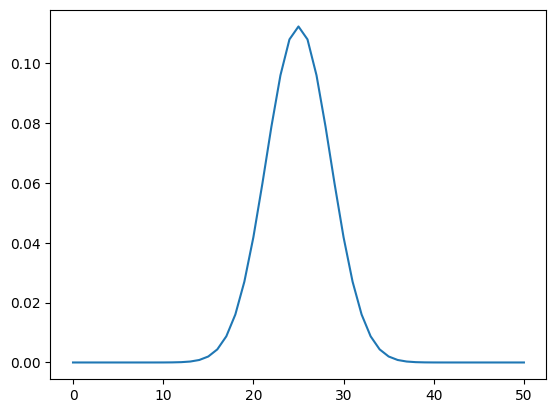

In [44]:
plt.plot(lst)

🧪 Test your results

In [45]:
from nbresult import ChallengeResult

result = ChallengeResult('factorial',
                         count_possibilities_11=count_possibilities(1,1),
                         count_possibilities_43=count_possibilities(4,3),
                         count_total_possibilities_10=count_total_possibilities(10),
                         probability_1=probability(1),
                         probability_100=probability(100)
                        )
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-random-variables/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 5 items

test_factorial.py::TestFactorial::test_count_possibilities_11 PASSED     [ 20%]
test_factorial.py::TestFactorial::test_count_possibilities_43 PASSED     [ 40%]
test_factorial.py::TestFactorial::test_count_total_possibilities_10 PASSED [ 60%]
test_factorial.py::TestFactorial::test_probability_1 PASSED              [ 80%]
test_factorial.py::TestFactorial::test_probability_100 PASSED            [100%]

============================== 5 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/factorial.pickle

git commit -m 'Completed factorial step'

git push origin master



<details>
    <summary><i>(Optional reading)</i> 🎳  <b>How do we compute the probability of getting <i>k</i> successes among <i>n</i> experiments  when $ p \neq \frac{1}{2} $</b> (<i>unfair coin</i>) ?</summary>

Don't forget that:
* the probability of success is $ \large p$ and we want $k$ successes $ \large \Rightarrow \underbrace{p \times p \times ... \times p}_\text{k successes} = p^k $
    
    
* the probability of failure is $ \large 1-p$ and we want $n-k$ failures $ \large \Rightarrow \underbrace{(1-p) \times (1-p) \times ... \times (1-p)}_\text{n-k failures} = (1-p)^{n-k}$
    
* there are $ \large \binom{n}{k} = \frac{n!}{k!(n-k)!} $ ways to obtain k successes among n experiments

🔥 The desired probability is given by:

$$ \large \mathbb{P} (X = k ) = \binom{n}{k} p^k (1-p)^{n-k} $$
    
🧨 The formula also works  with $ p = \frac{1}{2} $ and we have exactly what we computed in the previous function called `probability`:
    
$$ \large \mathbb{P} (X = k ) = \frac{\binom{n}{k}}{2^n} $$    

</details>

👀  Here are some [5 real life examples of the binomial distribution](https://www.statology.org/binomial-distribution-real-life-examples/)

### 1.4 Plotting the Binomial distribution: what happens when we toss the coin many times ?

👉 Let's start by tossing the coin **4 times** as in the previous section.

❓ Using the `probability` function, plot the `distribution` of a 4-coin experiment in a 📊 **bar chart**❓

<BarContainer object of 5 artists>

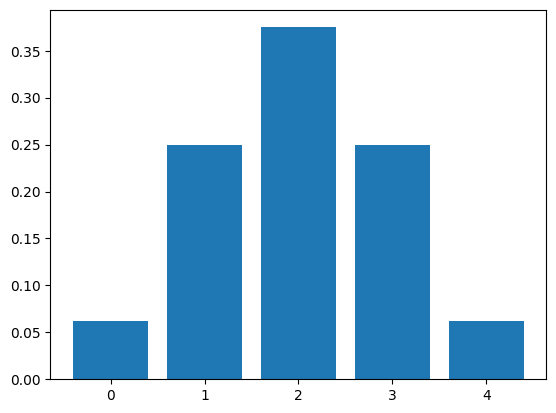

In [52]:
plt.bar(probability(4).keys(), probability(4).values())

😉 If you implemented your function correctly, you should visually see that:
- the event _"get 2 heads out of 4"_ has the highest probability (37.5%) 
- the distribution is symmetrical
- on average, you will get 2 heads

❓ Increase the number `n_toss` (1, 5, 10, 20, 30, ...) and  plot the distribution of a `n_toss`-coin experiment in a 📊 **bar chart**, using once again the `probability` function ❓

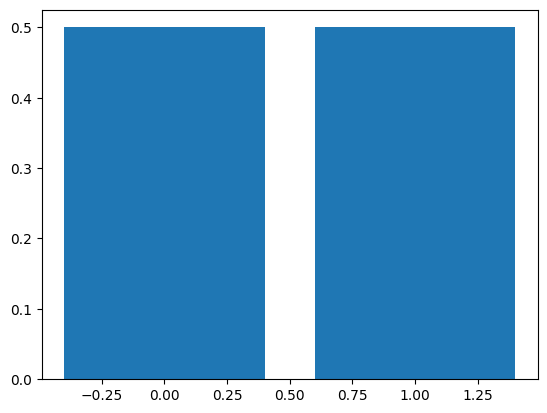

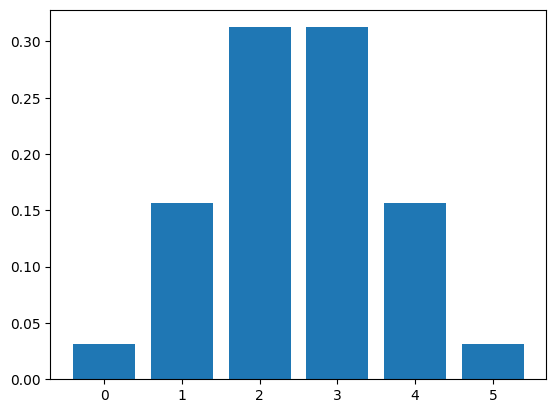

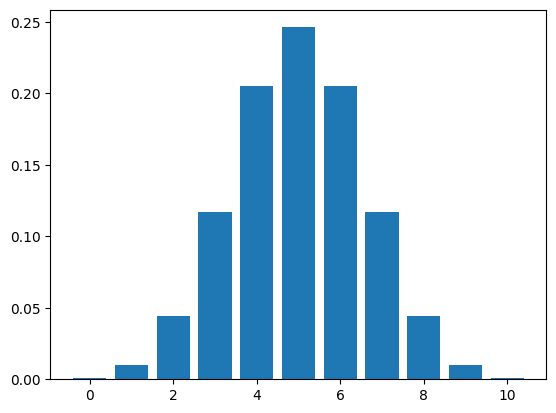

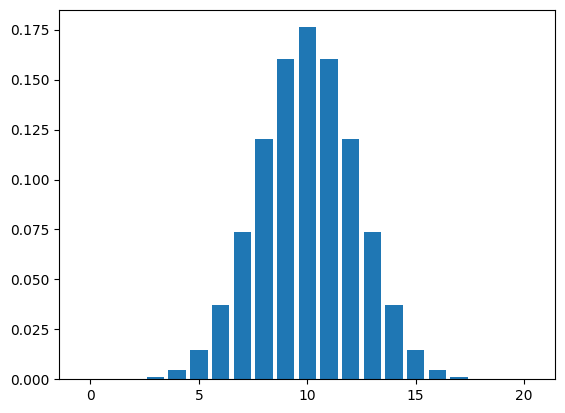

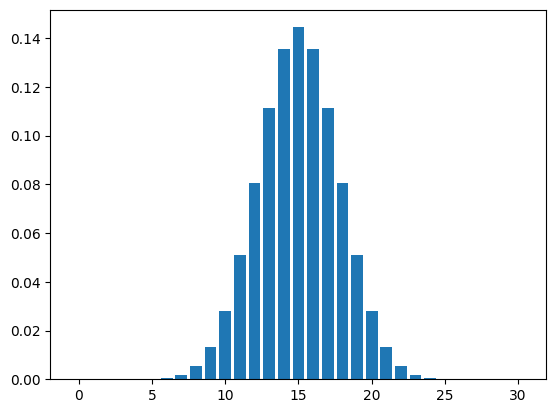

In [58]:
lst_of_tosses = [1,5,10,20,30]

for n_toss in lst_of_tosses:
    plt.bar(probability(n_toss).keys(), probability(n_toss).values())
    plt.show()
    
    possible_number_of_heads = probability(n_toss).keys()
    respective_probabilities = probability(n_toss).values()
#     plt.title(f"Tossing {n_toss} coins")
    plt.bar(possible_number_of_heads, respective_probabilities, color = 'pink');
#     plt.xlim((0-1, n_toss +1));
#     plt.figure(figsize = (2,2));
    plt.show()



❓ How does the probability distribution function evolve when you increase the number of experiments  ❓

> YOUR ANSWER HERE

<details>
    <summary>Consequence of increasing the number of tosses:</summary>
    
* If your implementation of the previous functions is correct, (the more coin flips you do =) **the more `n_toss` increases, the smoother the graph becomes**. 🤩 
        
* It converges towards the famous “bell curve” *a.k.a.* the **`normal distribution`** 🔥 

</details>        

## 2. The Geometric distribution

### 2.1 Passing the driving license test

🚗 Do you have your driving license ? You are probably aware that taking and passing this test is a juicy business... 

👉  The success rate of each attempt is for example:
* $ p_{FR} = 60 \% $ in France
* $ p_{UK} = 54.5 \% $ in the UK

😅 You probably have friends who took the test two or three times before succeeding. 

❓ What is the probability that a person living in the UK gets his/her driving license on the 2nd attempt ❓

In [3]:
proba_uk = 0.545

uk_two_attempts = (1 - proba_uk) * proba_uk 

print(f"The probability that a person living in the UK get his/her driving license after two attempts is {round(uk_two_attempts,4)*100} %")




The probability that a person living in the UK get his/her driving license after two attempts is 24.8 %


<details>
    <summary>Explanations</summary>
    
If a person needed two tests to pass the driving license, it means that he/she:
- failed ❌  at the first attempt with probability $ 1 - p$
- succeeded ✅ at the second attempt with probability $ p \in [0,1]$

assuming he/she didn't "learn" any lesson from the first failed attempt (!)
    
</details>

### 2.2 Modelling the first time of success (short reading section)

🧑🏻‍🏫 The goal of the **Geometric distribution** is the compute the <b>probability to succeed for the first time at the n<sup>th</sup> attempt </b>. This implies:
- $ n - 1 $ failures, each of them with probability $ 1 - p  \Rightarrow \underbrace{(1-p) \times (1-p) \times ... \times (1-p)}_\text{n-1 failures} = (1-p)^{n-1}$
- $ 1 $ unique success with probability $ p $

👉 Hence, if we denote by `X` the time of first success, and want to compute the probability of succeeding for the first time at the n<sup>th</sup> attempt </b>, we can use the following formula:

$$ \mathbb{P}(X=n) = (1-p)^{n-1} \times p $$

### 2.3 Application

❓ Create a function `probability_first_time` which returns the probability of succeeding for the first time  at the n<sup>th</sup> attempt </b> based in a probability of success $p$ ❓

In [5]:
def probability_first_time(p, n):
    ''' returns the probability of succeeding at the n-th attempt'''
    if n <= 0:
        return None
    return ((1-p)**(n-1))*p

👇 Let's vizualize the probabilities of the driving license test in the UK.

❓ 📊 Plot in a **bar chart** the (decreasing) probabilities of succedding after the 1<sup>st</sup> attempt, the <sup>2nd</sup> attempt, the <sup>3rd</sup> attempt, the <sup>4th</sup> attempt, the <sup>5th</sup> attempt 


In [6]:
max_num_attempts = 5

driving_licence_uk = {k: probability_first_time(proba_uk, k) for k in range(max_num_attempts+1)}
driving_licence_uk


{0: None,
 1: 0.545,
 2: 0.247975,
 3: 0.11282862499999999,
 4: 0.05133702437499999,
 5: 0.023358346090624996}

In [88]:
list(driving_licence_uk.values())[1:]

[0.545,
 0.247975,
 0.11282862499999999,
 0.05133702437499999,
 0.023358346090624996]

<BarContainer object of 5 artists>

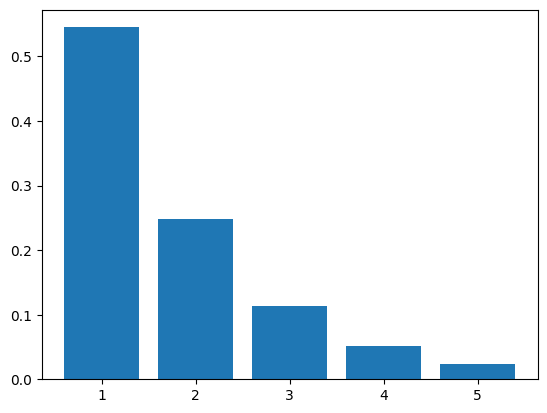

In [89]:
plt.bar(list(driving_licence_uk.keys())[1:], list(driving_licence_uk.values())[1:])

<details>    
    <summary> Visual takeaways:</summary>

You should see an *exponential* decrease of probabilities    
* The probability of triumphing the first practical driving test is approx 55%
* The probability of failing the first one and succeeding in the second one is approx 25%
* The probability of failing the first and the second ones and succeeding only in the third one is approx 11%

😝 The author of this challenge needed 3 attempts to pass his driving test in France 🤫
</details>

👀  Here are some [5 real life examples of the geometric distribution](https://www.statology.org/geometric-distribution-real-life-examples/)

## 3. Other distributions and conclusion (just a short reading section)

### 3.1 Discrete vs. Continous Random Variable

<b><u>Discrete Random Variable</u></b>

🧑🏻‍🏫  A Random Variable is qualified as **discrete** when its outcome can be "counted with your fingers":

Here are some examples of discrete random variables:
* Success (1) or Failure (0)
* Number of successes
* First time of success
* Goals scored during a football game
* Outcome of rolling a dice
* Number of tickets raised by a student during the bootcamp
* ...

💪 There are plenty of classic discrete distributions and we've already covered three of them: `Bernouli(p)`, `Binomial(n,p)`, `Geometric(p)` 👏 👏 👏

📚 _Here is an 8-min-read article that you could look into a bit later:_ [Probability Distributions with real life exemples](https://medium.datadriveninvestor.com/probability-distributions-with-real-life-examples-55d054f663a7)

<b><u>Continuous Random Variable</u></b>

👩🏻‍🏫 A Random Variable is qualified as **continuous** when... it is not discrete, to keep things simple!

Here are some examples of continous random variables:
* the temperature in 1 week
* the percentages of votes for a political party in the next election
* the stock price of a listed company in two years
* the average IQ in a sampled population
* ...

🚀 The most famous continuous probability distribution used in Data Science and in life in general is the **`Gaussian Distribution`** $ \mathcal{N} (\mu, \sigma) $. 

Many features on this planet  have a bell-shaped curve: 
* the height of  human beings
* the weight of new-borns
* the IQ
* the average retirement age for NFL players
* the blood pressure
* ...

🤔 But why does the Gaussian Distribution appear to model so many physical phenomena ??

<details>
    <summary markdown='span'>Answer</summary>
<br>
Because lots of macro-phenomena are the results of a sum (or mean) of independent processes!  
    
And the **Central Limit Theorem** tells us that sum of random variable converges towards the normal distribution!
(more on that in next challenge!)

</details>

<br>

There are many continuous probability distributions out there but it is completely out of the scope of the bootcamp.  
So please **stay focused on the Gaussian distribution** during the next weeks ❗️❗️❗️

🏁 Congratulations ! You've developped good intuitions about the science of probability !
 
💾 Do not forget to `git add/commit/push` !